In [24]:
!pip install little_mallet_wrapper

In [25]:
!pip install seaborn

In [26]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [27]:
!pip install little_mallet_wrapper
!pip install seaborn

In [28]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [29]:
#Replace filename/path
reddit_df = pd.read_csv('Desktop/Tampon_tax_Reddit/tampontax_Reddit_political_clean.csv', delimiter=",", encoding='utf-8')

In [30]:
reddit_df.head()

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,So-called 'Tampon tax' exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN


In [31]:
reddit_df['selftext'] = reddit_df['selftext'].astype(str)

In [32]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in reddit_df['selftext']]

In [33]:
original_texts = [text for text in reddit_df['selftext']]

In [34]:
reddit_titles = [title for title in reddit_df['title']]

In [35]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 156
Mean Number of Words per Document: 8.1
Vocabulary Size: 299


In [36]:
num_topics = 15

In [37]:
training_data = training_data

In [38]:
#Change to your desired output directory
output_directory_path = 'Desktop/topic-model-output/Reddit/Tampon_tax'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [39]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['like',
   'latin',
   'baby',
   'corporate',
   'female',
   'still',
   'careers',
   'mexico',
   'cloud',
   'diversity',
   'rare',
   'certify',
   'wear',
   'read',
   'chile',
   'societal',
   'focus',
   'according',
   'sexy',
   'use'],
  [],
  ['fortune',
   'women',
   'https',
   'treviño',
   'mexican',
   'said',
   'broadsheet',
   'tech',
   'really',
   'succession',
   'designer',
   'costume',
   'ceos',
   'softek',
   'executives',
   'ceo',
   'take',
   'eventually',
   'linkstack',
   'thirdlove'],
  ['org/p/n',
   'moveon',
   'petitions',
   'https',
   'periods',
   'tax',
   'personal',
   'news',
   'subscribed',
   'wage',
   'discussions',
   'come',
   'control',
   'birth',
   'like',
   'tampon'],
  ['nan', 'deleted', 'removed'],
  ['friendly',
   'little',
   'something',
   'looking',
   'r/feminism',
   'already',
   'nice',
   'gaps',
   'open',
   'along',
   'struggles',
   'unfiltered',
   'talk',
   'girls'],
  [],
  ['phvzdzdhem',
   '

In [40]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['like', 'latin', 'baby', 'corporate', 'female', 'still', 'careers', 'mexico', 'cloud', 'diversity', 'rare', 'certify', 'wear', 'read', 'chile', 'societal', 'focus', 'according', 'sexy', 'use']

✨Topic 1✨

[]

✨Topic 2✨

['fortune', 'women', 'https', 'treviño', 'mexican', 'said', 'broadsheet', 'tech', 'really', 'succession', 'designer', 'costume', 'ceos', 'softek', 'executives', 'ceo', 'take', 'eventually', 'linkstack', 'thirdlove']

✨Topic 3✨

['org/p/n', 'moveon', 'petitions', 'https', 'periods', 'tax', 'personal', 'news', 'subscribed', 'wage', 'discussions', 'come', 'control', 'birth', 'like', 'tampon']

✨Topic 4✨

['nan', 'deleted', 'removed']

✨Topic 5✨

['friendly', 'little', 'something', 'looking', 'r/feminism', 'already', 'nice', 'gaps', 'open', 'along', 'struggles', 'unfiltered', 'talk', 'girls']

✨Topic 6✨

[]

✨Topic 7✨

['phvzdzdhem', 'com/watch', 'next', 'www', 'https', 'youtube', 'radical', 'food', 'good', 'teens', 'pre', 'sex', 'waymen', 'wants', 'link', 'time

In [41]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [42]:
topic_distributions[0]

[0.0013498868058165112,
 4.193981483881975e-187,
 0.0013527747684336316,
 0.0020243895620106894,
 0.5364381186365567,
 0.0006692077741640836,
 7.176562167953891e-192,
 0.002733582551618719,
 0.003393264166681557,
 0.0013497572995605869,
 0.0013501785856418343,
 0.0027298798510109754,
 0.0013506440347311416,
 0.44253166055574344,
 0.0027266554080301623]

In [43]:
reddit_post_to_check = "Thousands Of Women Sign Petition Against The 'Tampon Tax'"

reddit_post_number = reddit_titles.index(reddit_post_to_check)

print(f"Topic Distributions for {reddit_titles[reddit_post_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[reddit_post_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Thousands Of Women Sign Petition Against The 'Tampon Tax'

✨Topic 0 ['like', 'latin', 'baby', 'corporate', 'female', 'still'] ✨
Probability: 0.001

✨Topic 1 [] ✨
Probability: 0.0

✨Topic 2 ['fortune', 'women', 'https', 'treviño', 'mexican', 'said'] ✨
Probability: 0.001

✨Topic 3 ['org/p/n', 'moveon', 'petitions', 'https', 'periods', 'tax'] ✨
Probability: 0.002

✨Topic 4 ['nan', 'deleted', 'removed'] ✨
Probability: 0.536

✨Topic 5 ['friendly', 'little', 'something', 'looking', 'r/feminism', 'already'] ✨
Probability: 0.001

✨Topic 6 [] ✨
Probability: 0.0

✨Topic 7 ['phvzdzdhem', 'com/watch', 'next', 'www', 'https', 'youtube'] ✨
Probability: 0.003

✨Topic 8 ['would', 'https', 'ask', 'support', 'org/freetheperiod', 'going'] ✨
Probability: 0.003

✨Topic 9 ['american', 'states', 'running', 'letter', 'details', 'newsletters'] ✨
Probability: 0.001

✨Topic 10 ['illinois', 'tax', 'tampon', 'repeal', 'signs', 'rauner'] ✨
Probability: 0.001

✨Topic 11 ['taxes', 'pay', 'kids

In [44]:
target_labels = random.sample(reddit_titles, 6)

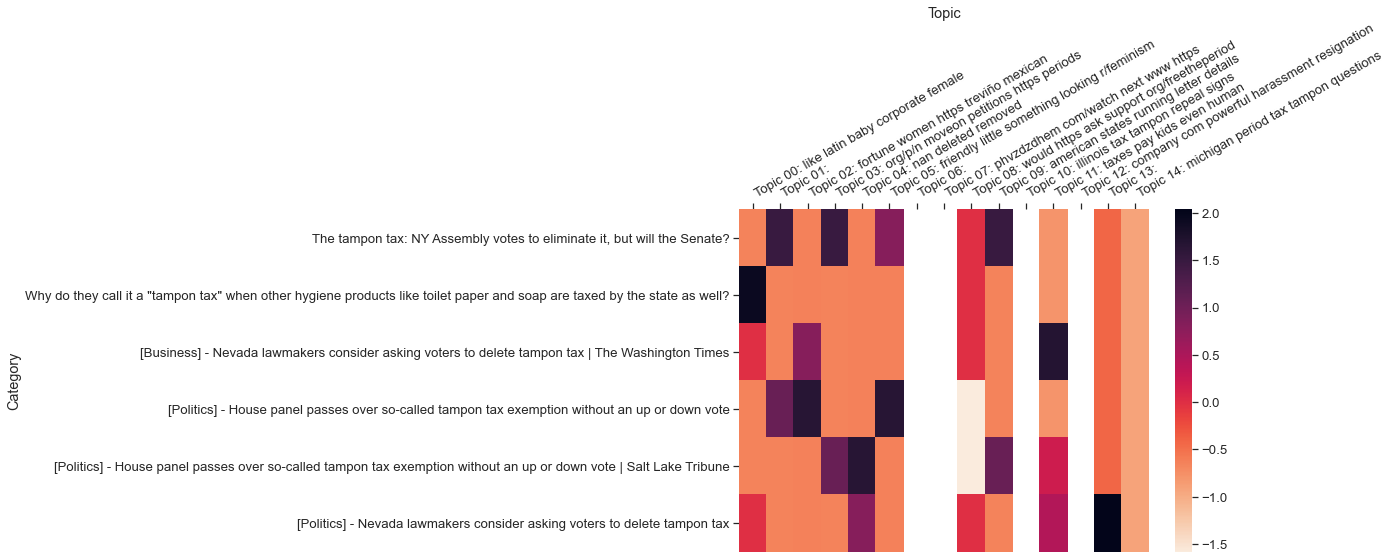

In [45]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(reddit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (18, 8)
                                     )

In [46]:
training_data_reddit_titles = dict(zip(training_data, reddit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [47]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_reddit_titles[document] + "\n")
    return

In [48]:
display_top_titles_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['michigan', 'period', 'tax', 'tampon', 'questions', 'feel', 'please', 'thank', 'find', 'around', 'power', 'actionnetwork', 'remove', 'stigma', 'menstrual', 'works', 'organization', 'currently', 'sign', 'resident']

0.4887 PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!

0.4887 PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!

0.4706 PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!

0.4525 PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!

0.4453 Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.



In [49]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        reddit_title = f"**{training_data_reddit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(reddit_title)), display(Markdown(original_text))
    return

In [50]:
display_bolded_topic_words_in_context(topic_number=14, number_of_documents=3)

✨Topic 14✨

['michigan', 'period', 'tax', 'tampon', 'questions', 'feel', 'please', 'thank', 'find', 'around', 'power', 'actionnetwork', 'remove', 'stigma', 'menstrual', 'works', 'organization', 'currently', 'sign', 'resident']



✨✨✨

**0.4887132777798792**

**PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!**

Hi everyone! I am **currently** working with PERIOD (a national **organization** that **works** to fight **menstrual** **stigma**, **period** poverty, and more through education, service, and advocacy) to **remove** the **tampon** **tax** in Michigan and it would be amazing if you all could **sign** this petition: https://**actionnetwork**.org/petitions/end-**tampon**-**tax**-**michigan**. It holds more **power** if you are a Michigan **resident**, but any signatures at all would be appreciated! Also, there are many other petitions going **around** for other states and you can **find** them here: https://www.**period**.org/freetheperiod. Thank you for your support! Please **feel** free to ask me any **questions**! :)

✨Topic 14✨

['michigan', 'period', 'tax', 'tampon', 'questions', 'feel', 'please', 'thank', 'find', 'around', 'power', 'actionnetwork', 'remove', 'stigma', 'menstrual', 'works', 'organization', 'currently', 'sign', 'resident']



✨✨✨

**0.4887132777798792**

**PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!**

Hi everyone! I am **currently** working with PERIOD (a national **organization** that **works** to fight **menstrual** **stigma**, **period** poverty, and more through education, service, and advocacy) to **remove** the **tampon** **tax** in Michigan and it would be amazing if you all could **sign** this petition: https://**actionnetwork**.org/petitions/end-**tampon**-**tax**-**michigan**. It holds more **power** if you are a Michigan **resident**, but any signatures at all would be appreciated! Also, there are many other petitions going **around** for other states and you can **find** them here: https://www.**period**.org/freetheperiod. Thank you for your support! Please **feel** free to ask me any **questions**! :)

✨Topic 14✨

['michigan', 'period', 'tax', 'tampon', 'questions', 'feel', 'please', 'thank', 'find', 'around', 'power', 'actionnetwork', 'remove', 'stigma', 'menstrual', 'works', 'organization', 'currently', 'sign', 'resident']



✨✨✨

**0.4706169156619355**

**PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!**

Hi everyone! I am **currently** working with PERIOD (a national **organization** that **works** to fight **menstrual** **stigma**, **period** poverty, and more through education, service, and advocacy) to **remove** the **tampon** **tax** in Michigan and it would be amazing if you all could **sign** this petition: https://**actionnetwork**.org/petitions/end-**tampon**-**tax**-**michigan**. It holds more **power** if you are a Michigan **resident**, but any signatures at all would be appreciated! Also, there are many other petitions going **around** for other states and you can **find** them here: https://www.**period**.org/freetheperiod. Thank you for your support! Please **feel** free to ask me any **questions**! :)